We want to get life expectancy by using the gapminder dataset. This dataset contains the some feature such as fertility rate, child_mortality & ... which we explain each them below. first we try to create model for predicting by using one feature as independece varible & life expectancy columns for dependence variable. 
<br/>
Next, we upgrade model by using all features (all columns) in gapminder dataset. 


life expectancy : the average number of years a newborn child would live if current mortality parents were to stay same.
<br/>
fertility rate  : birth per woman.
<br/>
child_mortality : child death rate.
<br/>
GDP             : gross domestic product per person  adjusted for differences(income per person=درآمد به ازای هر نفر)
<br/>
BMI             : Body mass index (BMI) is a measure of body fat based on height and weight that applies to men and women.
<br/>
CO2             : metric tonnes of CO2 per person.
<br/>
HIV             : HIV deaths.

Let's go!

# Library

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
np.set_printoptions(precision=3)

# Load data

In [3]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder_all.csv',index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.9+ KB


In [5]:
df.head()

population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  \
index                                                                         
0      34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049   
1      19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247   
2      40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915   
3       2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108   
4      21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755   

       life  child_mortality                      Region  
index                                                     
0      75.3             29.5  Middle East & North Africa  
1      58.3            192.0          Sub-Saharan Africa  
2      75.5             15.4                     America  
3      72.5             20.0       Europe & Central Asia  
4      81.5              5.2         East Asia & Pacific

In [6]:
df.describe()

population   fertility         HIV         CO2    BMI_male  \
count  1.390000e+02  139.000000  139.000000  139.000000  139.000000   
mean   3.549977e+07    3.005108    1.915612    4.459874   24.623054   
std    1.095121e+08    1.615354    4.408974    6.268349    2.209368   
min    2.773150e+05    1.280000    0.060000    0.008618   20.397420   
25%    3.752776e+06    1.810000    0.100000    0.496190   22.448135   
50%    9.705130e+06    2.410000    0.400000    2.223796   25.156990   
75%    2.791973e+07    4.095000    1.300000    6.589156   26.497575   
max    1.197070e+09    7.590000   25.900000   48.702062   28.456980   

                 GDP  BMI_female        life  child_mortality  
count     139.000000  139.000000  139.000000       139.000000  
mean    16638.784173  126.701914   69.602878        45.097122  
std     19207.299083    4.471997    9.122189        45.724667  
min       588.000000  117.375500   45.200000         2.700000  
25%      2899.000000  123.232200   62.200000         8.100000  
50%      9938.000000  126.519600   72.000000        24.000000  
75%     23278.500000  130.275900   76.850000        74.200000  
max    126076.000000  135.492000   82.600000       192.000000

In [7]:
# Create arrays for features and target variable
X = df['fertility'].values
y = df['life'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))
print('\n')
# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


# Exploring the Gapminder data

Before implementing the regression model, we should examine the existence of a descriptive relationship with the dependent variable by plotting a graph or calculating the correlation coefficient and the like, and if the results of these tools indicate the existence of a relationship (linear relationship or nonlinear relationship) let's look for a regression model.

As always, it is important to explore your data before building models

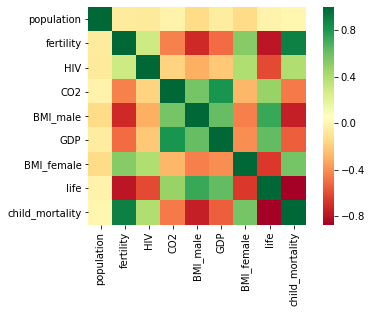

In [8]:
#constructe a heatmap showing the correlation between the different features of the Gapminder dataset

sns.heatmap(df.corr(), square=True, cmap='RdYlGn');

# Linear Regression

### Start to bulid a Linear Regression with one variable. (univariate linear regression)

In [9]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression


# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X), num=50).reshape(-1,1)

In [10]:
prediction_space.shape

(50, 1)

R^2 score is : 0.6192442167740035


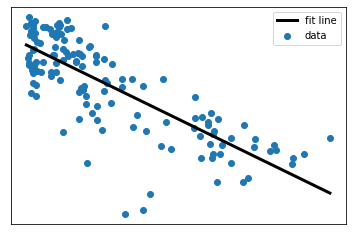

In [11]:
# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print('R^2 score is :',reg.score(X, y))

# Plot regression line
plt.scatter(X,y,label='data',alpha=1)
plt.plot(prediction_space, y_pred, color='black', linewidth=3,label='fit line')
plt.legend()
plt.xticks([])
plt.yticks([])
plt.show()

# 5-fold cross-validation 

In [12]:
# import cross-val-score
from sklearn.model_selection import cross_val_score

# create cross-val-score : cv_scores
cv_scores  = cross_val_score(reg, X, y ,cv=5)

# print cv_scores
print("cv_scores: ",cv_scores)

# compute & print the avrage of cross_validation
print("final scorer: {:.3f}".format(np.mean(cv_scores)))

cv_scores:  [0.71  0.75  0.553 0.548 0.524]
final scorer: 0.617


Great! Notice how the line captures the underlying trend in the data. $R^2$ Obtained 61.9% & does not match source data.As a result, we are looking for a better model.


# Multiple Linear Regression

### Start to bulid a Multiple Linear Regression with multi variable. (Multiple  Linear Regression)

##### we define features vector as below:
<br/>
feature 1 : population
<br/>
feature 2 : fertility
<br/>
feature 3 : HIV
<br/>
feature 4 : CO2
<br/>
feature 5 : BMI_male
<br/>
feature 6 : GDP
<br/>
feature 7 : BMI_female
<br/>
feature 8 : child_mortality
<br/>
& 
<br/>
target vector is life expectancy.

In [33]:
features = ["population","fertility","HIV","CO2","BMI_male","GDP","BMI_female","child_mortality"]

In [14]:
# Create arrays for features and target variable
XX = df.drop(columns=['life','Region'])
yy = df['life']

In [15]:
print("Dimensions of y : {}".format(yy.shape))
print("Dimensions of X : {}".format(XX.shape))

Dimensions of y : (139,)
Dimensions of X : (139, 8)


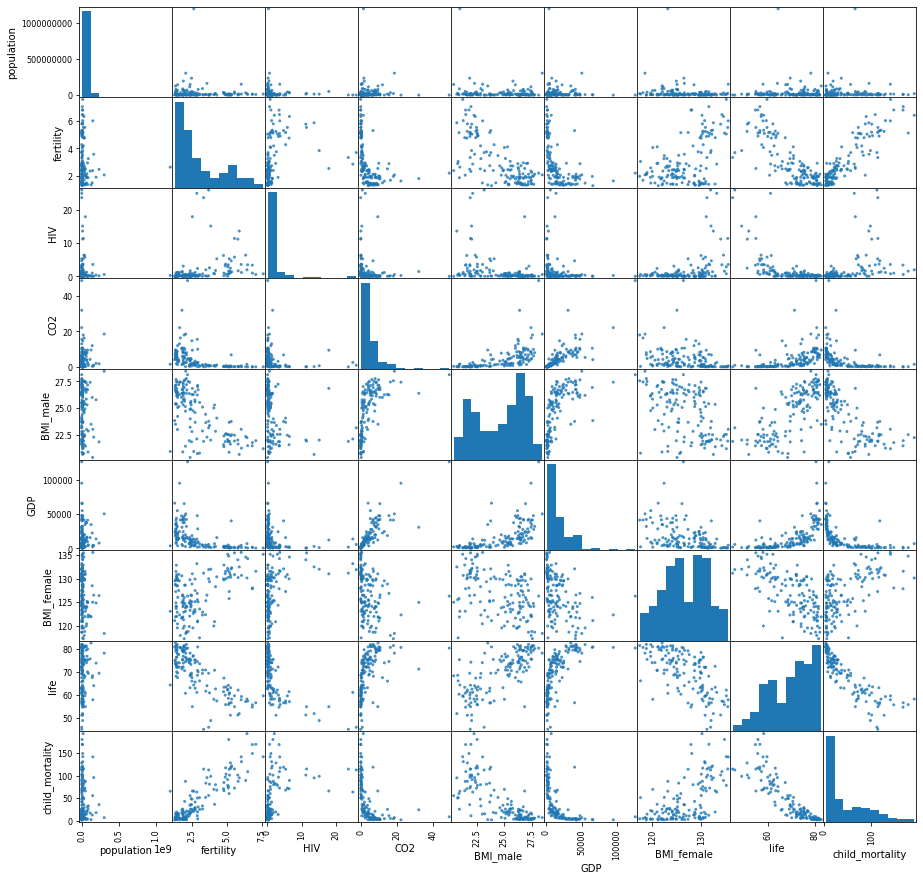

In [17]:
# show features histogram

pd.plotting.scatter_matrix(frame = df , alpha=0.8, figsize=(15,15),range_padding=0.05);

In [18]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test = train_test_split(XX, yy, test_size=0.2, random_state=42, shuffle=True)

# show vectors with size
print('Train data shape :{}'.format(X_train.shape))
print('Test data shape  :{}'.format(X_test.shape))
print('Train label shape:{}'.format(y_train.shape))
print('Test label shape :{}'.format(y_test.shape))

Train data shape :(111, 8)
Test data shape  :(28, 8)
Train label shape:(111,)
Test label shape :(28,)


In [19]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
multi_reg = LinearRegression()

# Fit the model to the data
multi_reg.fit(X_train, y_train)


print('weight coefficients:', multi_reg.coef_)
print('y_axis intercept   :', multi_reg.intercept_)

weight coefficients: [-1.465e-09 -4.310e-01 -5.919e-01 -2.054e-01  3.872e-01  1.450e-04
 -2.620e-01 -9.089e-02]
y_axis intercept   : 98.25603301614268


##  notice :

$$ y = Weights \, \times \, x + intercept $$
<br/>
$$ y = a \, \times\, x + b$$

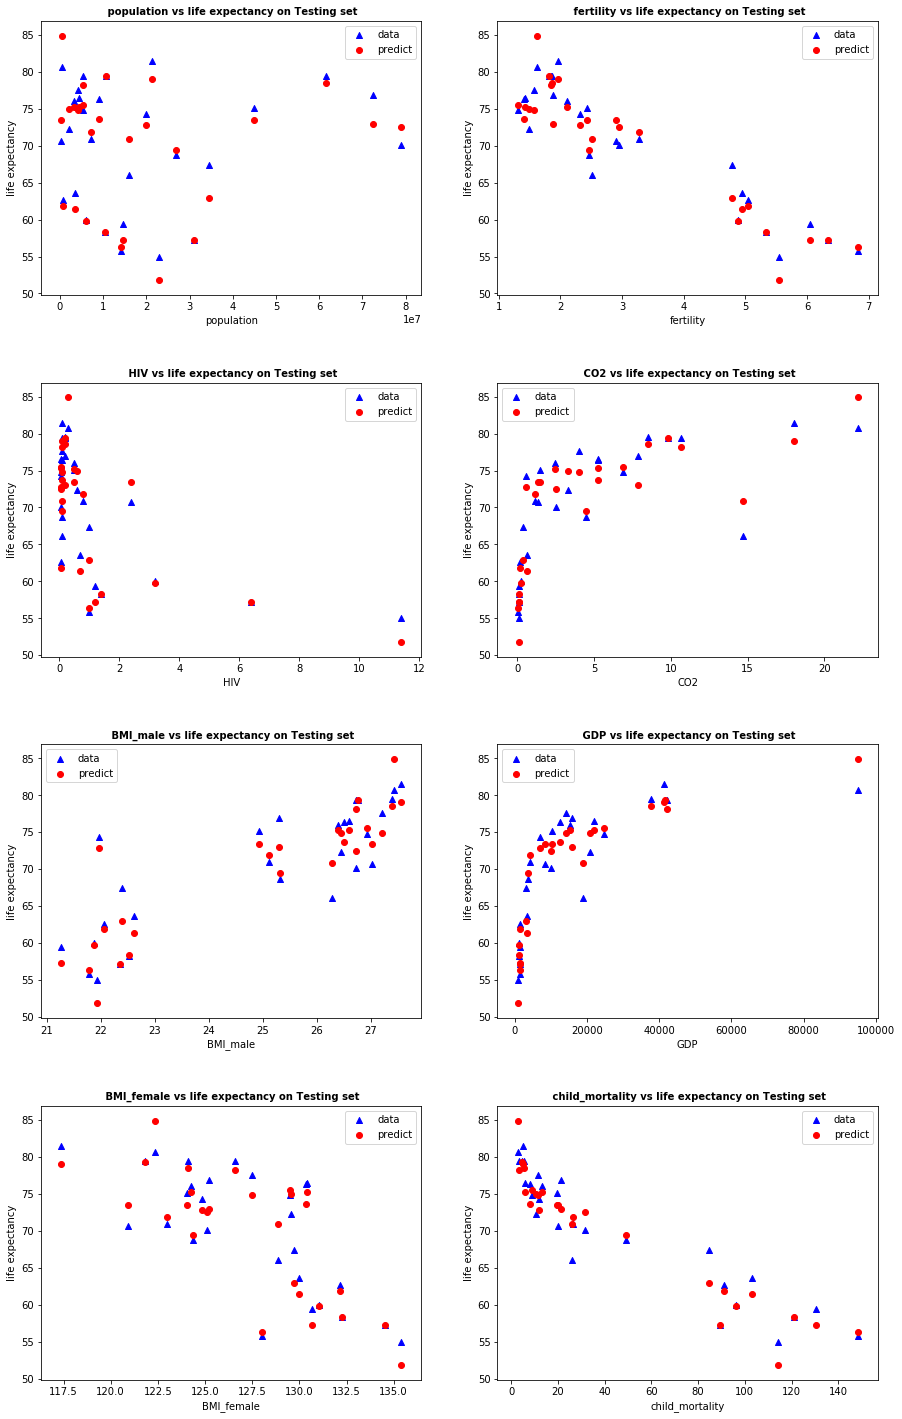

In [34]:
#Compute predictions over the test: y_pred
y_pred = multi_reg.predict(X_test)

# set the figure.
plt.figure(figsize=(15,25))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.32)

# show the predict.
for i in range(len(features)):
    plt.subplot(4,2,i+1)
    plt.scatter(X_test[features[i]],y_test, marker='^', color="blue",label='data')
    plt.scatter(X_test[features[i]],y_pred, marker='o', color="red",label='predict')
    
    plt.xlabel(features[i])
    plt.ylabel('life expectancy')
    plt.title(" {} vs life expectancy on Testing set".format(features[i]),fontweight="bold", fontsize=10)
    plt.legend()
    
plt.show();


In [31]:
X_test[features[0]]

(28,)

In [21]:
# Print R^2 over test data
print('R^2 score over test data is : {:.2f} %'.format(multi_reg.score(X_test, y_test)*100))

# Print R^2 over train data
print('R^2 score over train data is : {:.2f} %'.format(multi_reg.score(X_train, y_train)*100))

R^2 score over test data is : 92.05 %
R^2 score over train data is : 89.27 %


𝑅2 over test data Obtained 92.05 % & over train data was 89.27 % so the model performed well on both train & test datasets.
<br/>:)

In [22]:
# calcute Root Mean Squared Error (RMSE) & Mean Absolute Error (MAE) & Mean Squared Error (MSE) for evaluate model
from sklearn.metrics import mean_squared_error ,mean_absolute_error 

# calculation of rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# calculation of mae
mae = mean_absolute_error(y_test, y_pred)

# calculation of mse
mse = mean_squared_error(y_test , y_pred)

# print rmse
print('RMSE : {:.2f}'.format(rmse))

# print mae
print("MAE : {:.2f}".format(mae))

# print mse
print("MSE : {:.2f}".format(mse))

RMSE : 2.30
MAE : 1.85
MSE : 5.31


In [25]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(multi_reg, XX, yy, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the average 5-fold cross-validation score
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.817 0.829 0.902 0.806 0.945]
Average 5-Fold CV Score: 0.8599627722793579


# Regularized regresion --> Lasso reg

In [65]:
# Import Lasso
from sklearn.linear_model import Lasso

# Create a lasso regresion : lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor on the data
lasso.fit(XX, yy)

# compute & print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.    -0.    -0.     0.     0.     0.    -0.    -0.071]


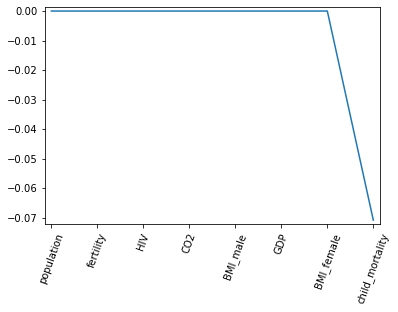

In [66]:
# Plot the coefficients
plt.plot(range(len(XX.columns)), lasso_coef)
plt.xticks(ticks=range(len(XX.columns)) , labels=XX.columns.values , rotation=70)
plt.margins(0.02)
plt.show()

# Regularized regresion --> Ridge reg

In [72]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

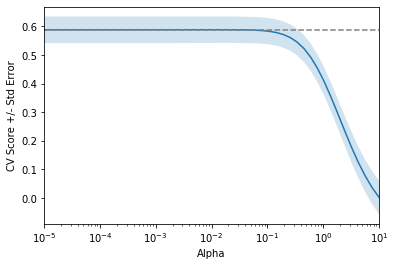

In [73]:
# Import necessary modules
from sklearn.linear_model import Ridge

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-5, 1, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:
 
    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
     
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
     
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
     
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
 
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

According to the figure above, regression adjustment coefficient ($ \lambda $) greater than $ 10^{-1} $ leads to reduce CV score & lower than $ 10^{-1} $ leads to increase score . So we choose $ \lambda = 10^{-2} $.

In [77]:
# Create a ridge regressor: ridge
ridge = Ridge(alpha=10^-2, normalize=True)

# Fit the regressor on the data
ridge.fit(XX, yy)

# compute & print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

[ 1.010e-11  5.565e-01  1.439e-01 -9.593e-02 -3.865e-01 -3.872e-05
  1.658e-01  2.145e-02]
